In [1]:
import sklearn.metrics 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
df = pd.read_csv('test.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [3]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [4]:
Activity_map = {'WALKING': 1, 'WALKING_UPSTAIRS': 2, 'WALKING_DOWNSTAIRS': 3, 'SITTING': 4, 'STANDING': 5, 'LAYING': 6}
df['Activity'] = df['Activity'].map(Activity_map)
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5


In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(df)
X_scaled = scaler.transform(df)

df_to_normalize = df.iloc[:, 1:-5]
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_to_normalize), columns=df_to_normalize.columns)

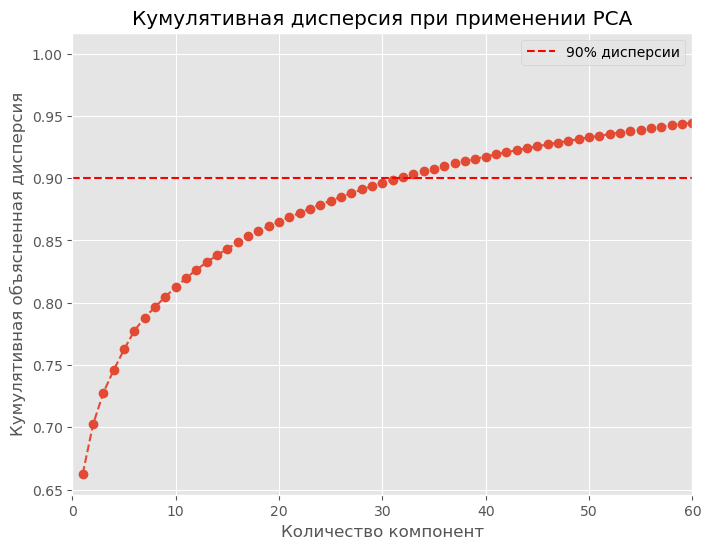

In [6]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_normalized)
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.xlim(0, 60)
plt.title('Кумулятивная дисперсия при применении PCA')
plt.xlabel('Количество компонент')
plt.ylabel('Кумулятивная объясненная дисперсия')
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% дисперсии')
plt.legend()
plt.show()

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=35)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("Форма исходного массива: {}".format(str(X_scaled.shape)))
print("Форма массива после сокращения размерности: {}".format(str(X_pca.shape)))

Форма исходного массива: (2947, 563)
Форма массива после сокращения размерности: (2947, 35)


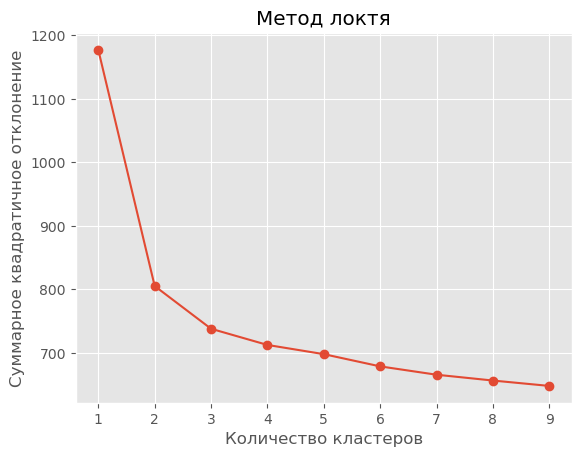

In [8]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.figure()
plt.plot(range(1, 10), inertia, marker='o');
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Суммарное квадратичное отклонение')
plt.show()

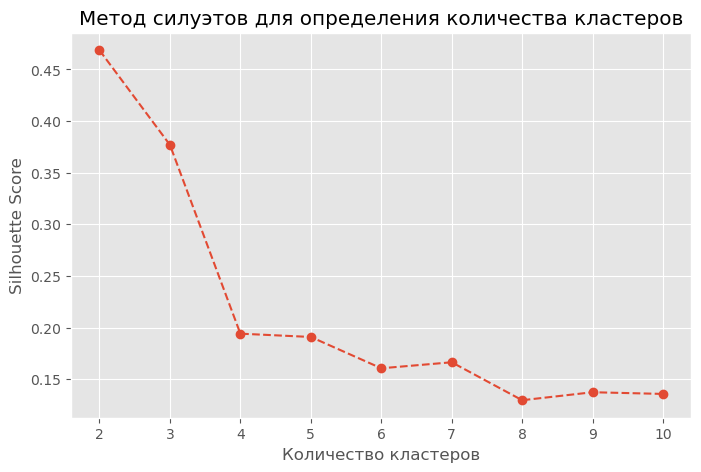

In [9]:
# Метод силуэтов
from sklearn.metrics import silhouette_score, davies_bouldin_score

max_clusters = 10 

silhouette_scores = []
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=1)
    clusters = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, clusters)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
plt.title('Метод силуэтов для определения количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.show()

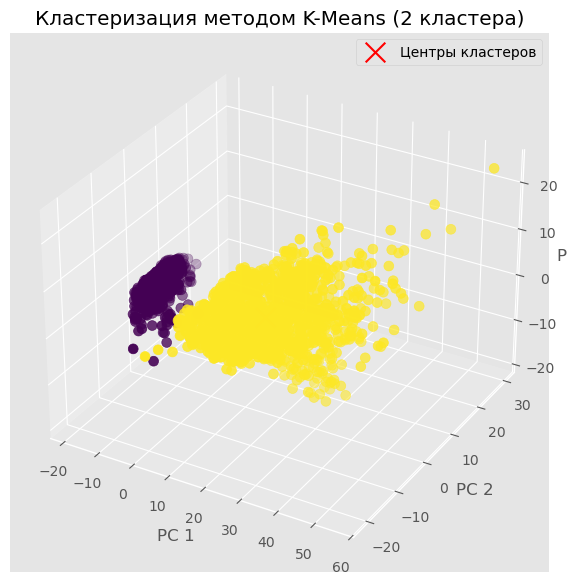

Silhouette Score: 0.46861049663850535
Davies-Bouldin Index: 0.8754501138245873


In [10]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(10, 7))

ax = plt.axes(projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis', s=50)

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', marker='x', s=200, label='Центры кластеров')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('Кластеризация методом K-Means (2 кластера)')

plt.legend()
plt.show()

silhouette = silhouette_score(X_pca, clusters)
db_index = davies_bouldin_score(X_pca, clusters)

print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {db_index}")

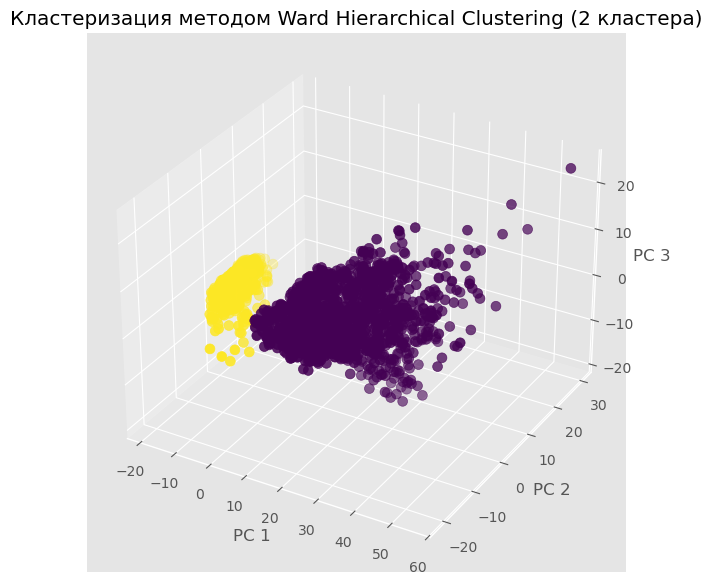

Silhouette Score: 0.46848066813337613
Davies-Bouldin Index: 0.8760265202949999


In [11]:
from sklearn.cluster import AgglomerativeClustering

agg_clust = AgglomerativeClustering(n_clusters=2, linkage='ward')  # Используем linkage='ward'
clusters = agg_clust.fit_predict(X_pca)

plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis', s=50)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('Кластеризация методом Ward Hierarchical Clustering (2 кластера)')

plt.show()

silhouette = silhouette_score(X_pca, clusters)
db_index = davies_bouldin_score(X_pca, clusters)

print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {db_index}")